#Insurance Cost Analysis

In this project, we perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)|
|charges| Annual Insurance charges in USD | float|

## Objectives
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models.

###Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

Importing the Dataset

In [10]:
df = pd.read_csv('/content/medical_insurance_dataset.csv', header = None)

In [11]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


Add the headers to the dataframe

In [12]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [13]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


 Replacing the '?' entries with 'NaN' values.

In [14]:
df.replace('?', np.nan, inplace=True)

###Data Wrangling

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Checking Missing Values

In [16]:
df.isnull().sum()

,0
age,4
gender,0
bmi,0
no_of_children,0
smoker,7
region,0
charges,0


Handle missing data:

- For continuous attributes (e.g., age), we replace missing values with the mean.
- For categorical attributes (e.g., smoker),we replace missing values with the most frequent value.
- Update the data types of the respective columns.

In [17]:
#Age column
df['age'] = df['age'].astype('float')
df['age'].replace(np.nan, df['age'].mean(), inplace=True)

/tmp/ipython-input-409542751.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(np.nan, df['age'].mean(), inplace=True)


In [18]:
#Smoker Column
df['smoker'].replace(np.nan, df['smoker'].value_counts().idxmax(), inplace=True)

/tmp/ipython-input-140562800.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace(np.nan, df['smoker'].value_counts().idxmax(), inplace=True)


In [19]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1,3,16884.92400
1,18.0,2,33.770,1,0,4,1725.55230
2,28.0,2,33.000,3,0,4,4449.46200
3,33.0,2,22.705,0,0,1,21984.47061
4,32.0,2,28.880,0,0,1,3866.85520


The `charges` column has values which are more than 2 decimal places long. So, we Update the `charges` column such that all values are rounded to nearest 2 decimal places.

In [20]:
df[['charges']] = np.round(df[['charges']], 2)

In [21]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1,3,16884.92
1,18.0,2,33.770,1,0,4,1725.55
2,28.0,2,33.000,3,0,4,4449.46
3,33.0,2,22.705,0,0,1,21984.47
4,32.0,2,28.880,0,0,1,3866.86


##Exploratory Data Analysis

Implementing a regression plot for `charges` with respect to `bmi`

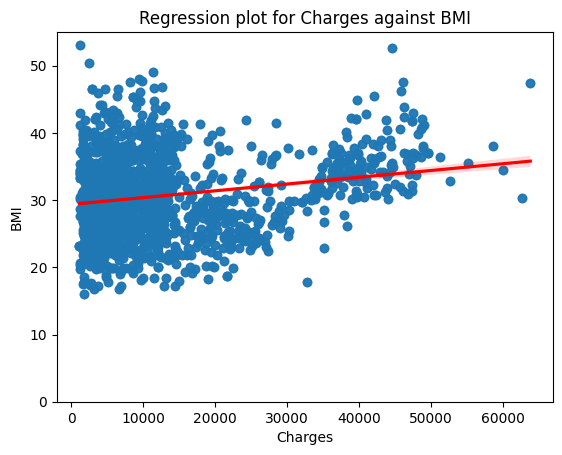

In [22]:
sns.regplot(x='charges', y='bmi', data=df, line_kws = {'color' : 'red'})
plt.ylim(0,)
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.title('Regression plot for Charges against BMI')
plt.show()

Implementing the box plot for `charges` with respect to `smoker`.


<Axes: xlabel='charges', ylabel='smoker'>

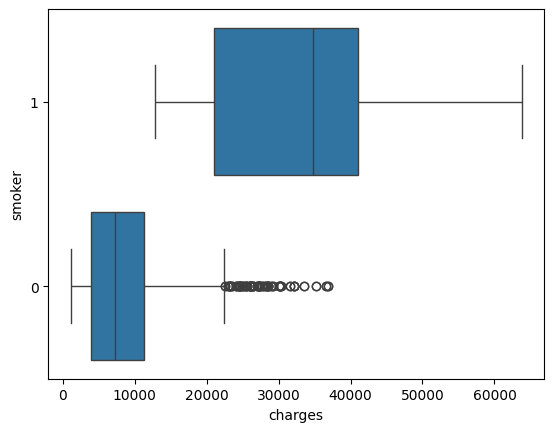

In [23]:
sns.boxplot(x='charges', y='smoker', data=df)

Correlation Matrix for the dataset

In [24]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026041,0.113045,0.037585,-0.023285,-0.007175,0.298622
gender,-0.026041,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113045,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037585,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023285,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007175,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298622,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


##Model Development

Fitting a Linear Regression Model to predict `charges` value by using the `smoker` attribute of the dataset. Let's take a look at the $ R^2 $ score of the model

In [25]:
lrm = LinearRegression()
X = df[['smoker']]
Y = df['charges']
lrm.fit(X, Y)
lrm.score(X, Y)

0.6221791733924185

Let's try to Fit a linear regression model to predict the `charges` value by using all other attributes of the dataset. Let's check if there is an improvement in the performance.


In [26]:
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lrm.fit(Z,Y)
lrm.score(Z,Y)

0.7504063772187107

We can see that there's an improvement from **0.62** to **0.75**

Let's create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. We can check if there's any further improvement.

In [27]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
r2_score(Y, ypipe)

0.8452558518297514

There's a significant improvement to **0.84**

##Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

Let's initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data subset and print the $ R^2 $ score for the testing data.

In [29]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
r2_score(y_test, yhat)

0.6760802462837339

Applying polynomial transformation to the training parameters with degree=2. We use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [30]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
r2_score(y_test, y_hat)

0.783563057875534